***Web Scraping with Python***  
*Statistics for Data Science Course*

https://www.nike.com/robots.txt  
/robots.txt to view permissions of a website

In [ ]:
import requests
from bs4 import BeautifulSoup as soup

In [ ]:
url="https://www.flipkart.com/google-pixel-quite-black-32-gb/p/itmfd69pzkgfhaj5?pid=MOBEMV9S9NMEZVZV&lid=LSTMOBEMV9S9NMEZVZVYIRMZY&marketplace=FLIPKART&store=tyy%2F4io&srno=b_1_2&otracker=browse&fm=organic&iid=92f051e3-3cc7-443d-bb2d-da37465f0d41.MOBEMV9S9NMEZVZV.SEARCH&ppt=None&ppn=None&ssid=gqpkfv4jsw0000001630315910177"

In [ ]:
page = requests.get(url)
page

<Response [200]>

In [ ]:
content=soup(page.content, 'html.parser')

print(content)

In [ ]:
name=content.find_all('p',class_="_2sc7ZR _2V5EHH")
print(name)

[<p class="_2sc7ZR _2V5EHH">ABUYOUSUFMDMAHBUB CHOUDHURY</p>, <p class="_2sc7ZR _2V5EHH">adi</p>, <p class="_2sc7ZR _2V5EHH">Shreyas Kumar</p>, <p class="_2sc7ZR _2V5EHH">Somesh  Maurya</p>, <p class="_2sc7ZR _2V5EHH">ShivRohit Vanagondi</p>, <p class="_2sc7ZR _2V5EHH">samarth v pattar</p>, <p class="_2sc7ZR _2V5EHH">Vinoth Kannah MP</p>, <p class="_2sc7ZR _2V5EHH">Rakesh Gupta</p>, <p class="_2sc7ZR _2V5EHH">Flipkart Customer</p>, <p class="_2sc7ZR _2V5EHH">Sreeraj</p>]


In [ ]:
names=[]
for i in range(len(name)):
  names.append(name[i].getText())
print(names)

['ABUYOUSUFMDMAHBUB CHOUDHURY', 'adi', 'Shreyas Kumar', 'Somesh  Maurya', 'ShivRohit Vanagondi', 'samarth v pattar', 'Vinoth Kannah MP', 'Rakesh Gupta', 'Flipkart Customer', 'Sreeraj']


In [ ]:
review=content.find_all('p',class_="_2-N8zT")
reviews=[]
for i in range(len(review)):
  reviews.append(review[i].getText())
print(reviews)

['Excellent', 'Really Nice', 'Awesome', 'Mind-blowing purchase', 'Long awaited for Google Pixel ...', 'Great product', 'Awesome Product - One of Best Premium phones', 'Excellent Delivery and Cool Phone,...', 'Very Good', 'Best of Google']


In [ ]:
import pandas as pd

In [ ]:
#<div class="_3LWZlK _1BLPMq">5</div>
rating=content.find_all(class_="_3LWZlK _1BLPMq")
ratings=[]
for i in range(len(rating)):
  ratings.append(int(rating[i].getText()))
print(ratings)

[5, 5, 5, 5, 5, 5, 5, 5, 4, 4]


In [ ]:
# Alternate method to store data in a datafram
#df=pd.Dataframe()
#df['Column heading']= list_name

df = pd.DataFrame(list(zip(names, ratings, reviews)),
               columns =['Name', 'Ratings', 'Reviews'])
df

,Name,Ratings,Reviews
0,ABUYOUSUFMDMAHBUB CHOUDHURY,5,Excellent
1,adi,5,Really Nice
2,Shreyas Kumar,5,Awesome
3,Somesh Maurya,5,Mind-blowing purchase
4,ShivRohit Vanagondi,5,Long awaited for Google Pixel ...
5,samarth v pattar,5,Great product
6,Vinoth Kannah MP,5,Awesome Product - One of Best Premium phones
7,Rakesh Gupta,5,"Excellent Delivery and Cool Phone,..."
8,Flipkart Customer,4,Very Good
9,Sreeraj,4,Best of Google


In [ ]:
df.describe()

,Ratings
count,10.000000
mean,4.800000
std,0.421637
min,4.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
df.to_csv("Customer Data.csv")

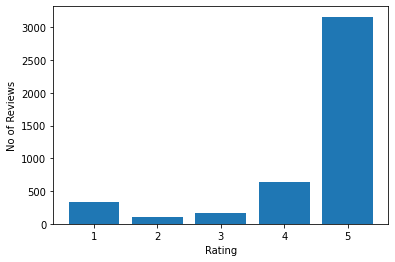

In [ ]:
#<span class="_26f_zl">5</span>
#<div class="_1uJVNT">337</div>

from matplotlib import pyplot as plt
p=content.find_all(class_="_26f_zl")
q=content.find_all(class_="_1uJVNT")
r1=[]
r2=[]

for i in range(len(p)):
  r1.append(int(p[i].getText()))
  r2.append((q[i].getText()))
r2=[x.replace(",","") for x in r2]
r2=[int(x) for x in r2]
#print(r1,r2)
plt.bar(r1,r2)
plt.xlabel("Rating")
plt.ylabel("No of Reviews")
plt.show()